In [1]:
from shapely.geometry import Point, LineString
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import altair as alt
from altair import *
alt.renderers.enable('notebook')
from vega_datasets import data

In [2]:
july_scooters = pd.read_csv('./data/july_trip.csv')
july_scooters.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000


In [3]:
#trip distance of 1/4 mile which is 1320 feet. 
july_distance = july_scooters.query('tripDistance >=1320') 
july_distance.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
5,2019-07-01 00:03:52.060000,Lyft,LFT7,Powered840423,3.716183,2375.32816,2019-07-01 00:00:00,00:00:08.963333,2019-07-01 00:00:00,00:03:51.933333,36.14933,-86.79760,36.15265,-86.79706,"[[36.14933,-86.7976],[36.14942,-86.7975],[36.1...",2019-07-02 09:34:36.953000
10,2019-07-01 00:08:01.777000,Lyft,LFT11,Powered414680,6.297550,5488.84532,2019-07-01 00:00:00,00:01:43.776666,2019-07-01 00:00:00,00:08:01.630000,36.15249,-86.79472,36.13892,-86.80048,"[[36.15249,-86.79472],[36.15235,-86.79489],[36...",2019-07-02 09:34:37.087000


In [4]:
#time duration of greater than 5 minutes
july_time = july_distance.query('5<=tripDuration<=120') 
july_time.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
10,2019-07-01 00:08:01.777000,Lyft,LFT11,Powered414680,6.297550,5488.84532,2019-07-01 00:00:00,00:01:43.776666,2019-07-01 00:00:00,00:08:01.630000,36.15249,-86.79472,36.13892,-86.80048,"[[36.15249,-86.79472],[36.15235,-86.79489],[36...",2019-07-02 09:34:37.087000
11,2019-07-01 00:08:15.163000,Lyft,LFT12,Powered635347,6.776617,5383.85844,2019-07-01 00:00:00,00:01:28.440000,2019-07-01 00:00:00,00:08:15.036666,36.15234,-86.79483,36.13895,-86.80047,"[[36.15234,-86.79483],[36.15219,-86.79494],[36...",2019-07-02 09:34:37.120000


In [5]:
july_fourth = july_time.query('startDate<"2019-07-05" & startDate >= "2019-07-04" & endDate <"2019-07-05"') 
july_fourth.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
10735,2019-07-04 00:06:08.743000,Bird,BRD2833,PoweredKP479,7.0,8202.100,2019-07-04 00:00:00,00:00:33.490000,2019-07-04 00:00:00,00:07:57.330000,36.1738,-86.7564,36.1769,-86.7515,"[[36.173878,-86.756346],[36.174015,-86.756398]...",2019-07-05 05:30:17.320000
10738,2019-07-04 00:06:08.743000,Bird,BRD2830,PoweredVW7GJ,5.0,3608.924,2019-07-04 00:00:00,00:01:34.033333,2019-07-04 00:00:00,00:06:41.636666,36.1518,-86.7811,36.1519,-86.7812,"[[36.151915,-86.781101]]",2019-07-05 05:30:17.227000


In [6]:
fourth_filtered = july_fourth.query('startTime >= "20:00:00" & endTime <="22:00:00"') 
fourth_filtered.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
14341,2019-07-04 20:07:02.167000,Bird,BRD2696,PoweredRQHRV,5.0,6561.680000,2019-07-04 00:00:00,20:02:21.066666,2019-07-04 00:00:00,20:07:18.870000,36.160600,-86.789600,36.156500,-86.787400,"[[36.160394,-86.789929],[36.156577,-86.787366]...",2019-07-05 05:31:28.850000
14348,2019-07-04 20:07:05,Gotcha,GOT48,Powered1641,9.0,2488.303885,2019-07-04 00:00:00,20:07:09,2019-07-04 00:00:00,20:16:09,36.156735,-86.775673,36.160362,-86.781571,"[[""36.156870000000005"",""-86.77568000000001""],[...",2019-07-05 07:07:42.897000


In [7]:
nashville = gpd.read_file('./data/MDHA_Promise_Zones/Export_Output_5.shp')
nashville.geometry = nashville.geometry.to_crs(epsg=4326)

In [17]:
fourth_filtered.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry
14341,2019-07-04 20:07:02.167000,Bird,BRD2696,PoweredRQHRV,5.0,6561.680000,2019-07-04 00:00:00,20:02:21.066666,2019-07-04 00:00:00,20:07:18.870000,36.160600,-86.789600,36.156500,-86.787400,"[[36.160394,-86.789929],[36.156577,-86.787366]...",2019-07-05 05:31:28.850000,"LINESTRING (-86.789929 36.160394, -86.78736600..."
14348,2019-07-04 20:07:05,Gotcha,GOT48,Powered1641,9.0,2488.303885,2019-07-04 00:00:00,20:07:09,2019-07-04 00:00:00,20:16:09,36.156735,-86.775673,36.160362,-86.781571,"[[""36.156870000000005"",""-86.77568000000001""],[...",2019-07-05 07:07:42.897000,"LINESTRING (-86.77568000000001 36.15687, -86.7..."


In [22]:
fourth_filtered = fourth_filtered.reset_index()
fourth_filtered = fourth_filtered.drop(278)

In [24]:
def build_LineString(string):
    coord_list = json.loads(string)
    if len(coord_list) <=1:
        return np.NaN
    else:
        try:
            return LineString([Point(float(lng), float(lat)) for lat, lng in coord_list])
        except:
            print(string)
            raise

In [25]:
fourth_filtered['geometry'] = fourth_filtered.tripRoute.apply(build_LineString)

In [26]:
fourth_filtered=fourth_filtered.loc[fourth_filtered.geometry.notna()]

In [27]:
unique_geo=gpd.GeoDataFrame(fourth_filtered,crs=nashville.crs, geometry=fourth_filtered.geometry)

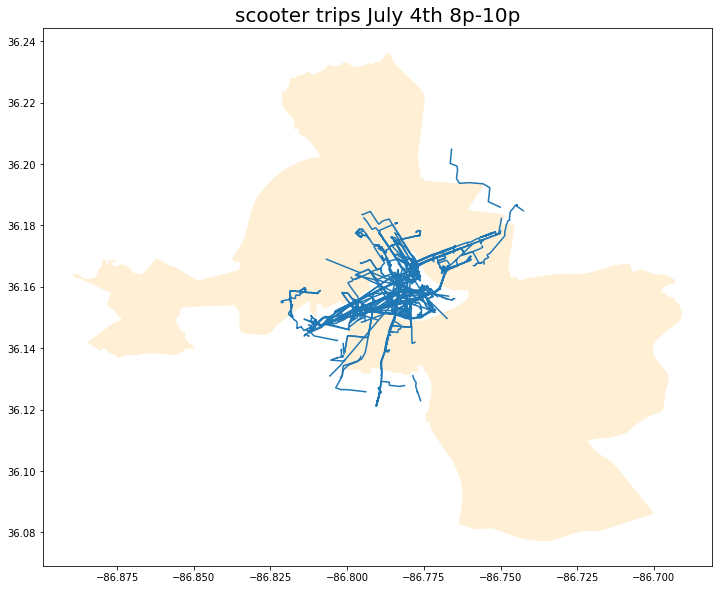

In [28]:
ax = nashville.plot(figsize = (12, 12), color = 'papayawhip')
unique_geo.plot(ax=ax)
plt.title('scooter trips July 4th 8p-10p', fontsize=20)
plt.savefig("July 4th 8pm-10pm")
plt.show();